# Лабораторна робота №5 з Видобування даних
## Моделювання
### Мета роботи: використати нові інструменти і алгоритми з sckit learn для тренування більш якісних моделей
### В рамках другої частини лабораторної роботи з етапу моделювання ми будемо працювати з складнішими варіантами алгоритмів: [регресія](https://towardsdatascience.com/choosing-a-scikit-learn-linear-regression-algorithm-dd96b48105f5) (може бути на ваш вибір  або пройтися по flowchart), [порівняння алгоритмів ](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) для класифікації та [та один з більш підходящих алгоритмів для ваших даних](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html) для кластеризації. 



###1.[Завантажте набір даних у колаб](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92), і у data frame 

In [1]:
### Code starts from here ###
import pandas as pd

url = 'https://raw.githubusercontent.com/AndrewVoisovych/DataMiningLabs/master/understat.com.csv'
dataset = pd.read_csv(url)

dataset = dataset[['сhampionship', 'season','matches','position', 'team', 'wins', 'loses', 'draws', 'scored', 'xG', 'deep', 'deep_allowed' , 'xG_diff', 'missed', 'xGA','pts','xpts', 'xpts_diff']]
dataset = dataset.drop(dataset[dataset['сhampionship'] == 'RFPL'].index)

dataset.head(20)



,сhampionship,season,matches,position,team,wins,loses,draws,scored,xG,deep,deep_allowed,xG_diff,missed,xGA,pts,xpts,xpts_diff
0,La_liga,2014,38,1,Barcelona,30,4,4,110,102.980152,489,114,-7.019848,21,28.444293,94,94.0813,0.0813
1,La_liga,2014,38,2,Real Madrid,30,6,2,118,95.766243,351,153,-22.233757,38,42.607198,92,81.7489,-10.2511
2,La_liga,2014,38,3,Atletico Madrid,23,6,9,67,57.047670,197,123,-9.952330,29,29.069107,78,73.1353,-4.8647
3,La_liga,2014,38,4,Valencia,22,5,11,70,55.062500,203,172,-14.937500,32,39.392572,77,63.7068,-13.2932
4,La_liga,2014,38,5,Sevilla,23,8,7,71,69.526624,305,168,-1.473376,45,47.862742,76,67.3867,-8.6133
5,La_liga,2014,38,6,Villarreal,16,10,12,48,56.767999,242,171,8.767999,37,40.701813,60,62.7363,2.7363
6,La_liga,2014,38,7,Athletic Club,15,13,10,42,45.542151,183,171,3.542151,41,44.106707,55,53.3585,-1.6415
7,La_liga,2014,38,8,Celta Vigo,13,13,12,47,58.887332,287,207,11.887332,44,51.777138,51,55.0488,4.0488
8,La_liga,2014,38,9,Malaga,14,16,8,42,46.221008,184,184,4.221008,48,54.130818,50,48.5128,-1.4872
9,La_liga,2014,38,10,Rayo Vallecano,15,19,4,46,47.790696,147,219,1.790696,68,70.433460,49,43.5455,-5.4545


### 2. Використатйте метод [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) для того щоб отримати набір для тренування і тестування моделі

In [32]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as seabornInstance 
import matplotlib.pyplot as plt  
import numpy as np  
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings('ignore')


###2.Оберіть метод який би хотіли викорситати для ваших даних - наведіть приклади щоб ви хотіли за допомогою нього отримати (передбачити чи класифікувати , розбити на групи і що саме) та аргументуйте чому обрали його (тепер вже конкретний алгоритм )


[7]
0.1836734693877551
              precision    recall  f1-score   support

           1       0.67      0.80      0.73        10
           2       0.17      0.17      0.17         6
           3       0.43      0.43      0.43         7
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.20      0.50      0.29         2
           7       0.11      0.33      0.17         3
           8       0.20      0.25      0.22         4
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         9
          12       0.20      0.17      0.18         6
          13       0.00      0.00      0.00         6
          14       0.25      0.25      0.25         4
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         6
    

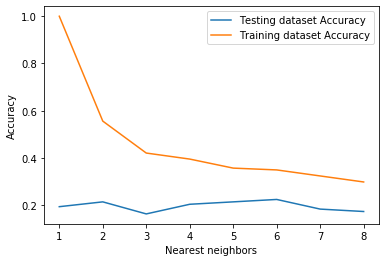

In [12]:
from sklearn.neighbors import KNeighborsClassifier 
X = dataset[['xpts']]
Y = dataset['position']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=7) 
from sklearn.metrics import classification_report, confusion_matrix
  
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)  
custom_predict = knn.predict([[39]])
print(custom_predict)

# Predict on dataset which model has not seen before 
print(knn.score(X_test, y_test)) 
print(classification_report(y_test, y_pred))

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
 
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Nearest neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


###3.Використайте метод на своїх даних натренувавши модель. Наведіть метрку після тренування на вашх тестових даних
 

In [62]:
X = dataset[['deep', 'deep_allowed', 'xG']]
X = pd.get_dummies(data = X)
y = dataset['pts'].values

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)

from sklearn import linear_model
regr = linear_model.ARDRegression()
regr.fit(X_train, y_train)
predicted = regr.predict(X_test)

print("ARDRegression")
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

ARDRegression
RMSE:  8.552013356918854


In [88]:
regr1 = linear_model.BayesianRidge()
regr1.fit(X_train, y_train)
predicted1 = regr1.predict(X_test)


from sklearn.kernel_ridge import KernelRidge
regr2 = KernelRidge(alpha=1.0)
regr2.fit(X_train, y_train)
predicted2 = regr2.predict(X_test)

regr3 = linear_model.ElasticNet(random_state=0)
regr3.fit(X_train, y_train)
predicted3 = regr3.predict(X_test)


from sklearn.svm import LinearSVR
regr4 = LinearSVR(random_state=5, tol=1e-5)
regr4.fit(X_train, y_train)
predicted4 = regr4.predict(X_test)

regr5 = linear_model.Lars(n_nonzero_coefs=1)
regr5.fit(X_train, y_train)
predicted5 = regr5.predict(X_test)

regr6 = linear_model.Lars(n_nonzero_coefs=4)
regr6.fit(X_train, y_train)
predicted6 = regr6.predict(X_test)




df = {
    'ARDRegression: ': [np.sqrt(metrics.mean_squared_error(y_test, predicted))],
    'LinearRegression': [np.sqrt(metrics.mean_squared_error(y_test, predicted1))],
    'BayesianRidge': [np.sqrt(metrics.mean_squared_error(y_test, predicted3))], 
    'KernelRidge': [np.sqrt(metrics.mean_squared_error(y_test, predicted2))],
    'ElasticNet':  [np.sqrt(metrics.mean_squared_error(y_test, predicted3))],
    'LinearSVR':  [np.sqrt(metrics.mean_squared_error(y_test, predicted4))],
    'Lars(nz=1)':  [np.sqrt(metrics.mean_squared_error(y_test, predicted5))],
    'Lars(nz=5)':  [np.sqrt(metrics.mean_squared_error(y_test, predicted6))]
    }
print(pd.DataFrame(data=df))


   ARDRegression:   LinearRegression  BayesianRidge  KernelRidge  ElasticNet  \
0         8.552013          8.597444       8.593939      8.63933    8.593939   

   LinearSVR  Lars(nz=1)  Lars(nz=5)  
0   8.825877    12.85211    8.577971  
